In [1]:
import os 
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [72]:
import pandas as pd

df=pd.read_csv('/content/danawa5_label.csv',encoding='CP949')
del df['Unnamed: 0']

df

,text,label
0,오늘 구입한 고구마 달콤한 년산 꿀 고구마 실중량 를 먹어보니 맛이 좋고 질도 좋...,1
1,그제 저녁에 주문해서 오늘 받았어요 고구마 크기는 좋네요 요전에 한입사이즈로 다른곳...,1
2,예전에도 한입 크기 구매했는데지금까지 한입크기 사이즈 주문한것중에 제일 작네요정말 ...,0
3,사이즈라던지 맛이라던지 떠나서 실온에 보관해둔 고구마인데 너무 빨리 물러지고 상하길...,0
4,한입고구마 라고는 하지만 제입이 커서 그런지는 몰라도반입고구마 라고 하는게 맞을것 ...,0
...,...,...
1754,함냐함냐함,0
1755,빠른배송에 물건잘받았습니다,1
1756,보통이었네요,0
1757,다 썩어서,0


In [73]:
df['label'].value_counts()

1    1215
0     544
Name: label, dtype: int64

In [74]:
good_text=[]
bad_text=[]

for i in range(len(df)):
    if df.loc[i,'label']==1:
        good_text.append(df.loc[i,'text'])
    else:
        bad_text.append(df.loc[i,'text'])

In [75]:
good_text = [x for x in good_text if pd.isnull(x) == False]
bad_text = [x for x in bad_text if pd.isnull(x) == False]

In [6]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 9.50 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [7]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [ ]:
!bash ./install_mecab-ko_on_colab190912.sh

In [9]:
from konlpy.tag import Okt
okt = Okt()

In [76]:
good_morphs = []
bad_morphs = []

for i in range(len(good_text)):
    try:
        good_morphs.append(okt.pos(good_text[i]))
    except UnicodeDecodeError:
        pass

for i in range(len(bad_text)):
    try:
        bad_morphs.append(okt.pos(bad_text[i]))
    except UnicodeDecodeError:
        pass

In [77]:
good_list=[] 
bad_list=[] 

for sentence in good_morphs : 
    for word, tag in sentence : 
        if tag in ['Noun','Adjective']:
            good_list.append(word)

for sentence in bad_morphs : 
    for word, tag in sentence : 
        if tag in ['Noun','Adjective']:
            bad_list.append(word)

In [78]:
from collections import Counter

good_count = Counter(good_list)
good_word = dict(good_count.most_common())

bad_count = Counter(bad_list)
bad_word = dict(bad_count.most_common())

In [69]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

In [98]:
max = 100
good_top = {}
bad_top = {}

for word, counts in good_count.most_common(max):
    good_top[word] = counts 

for word, counts in bad_count.most_common(max):
    bad_top[word] = counts  

In [95]:
bad_top

{'고구마': 233,
 '맛': 101,
 '크기': 65,
 '것': 55,
 '밤': 51,
 '입': 49,
 '좀': 47,
 '작아요': 40,
 '주문': 40,
 '상품': 35,
 '배송': 34,
 '구매': 32,
 '사이즈': 32,
 '상태': 32,
 '좋아요': 29,
 '꿀': 29,
 '박스': 29,
 '입니다': 28,
 '요': 26,
 '생각': 25}

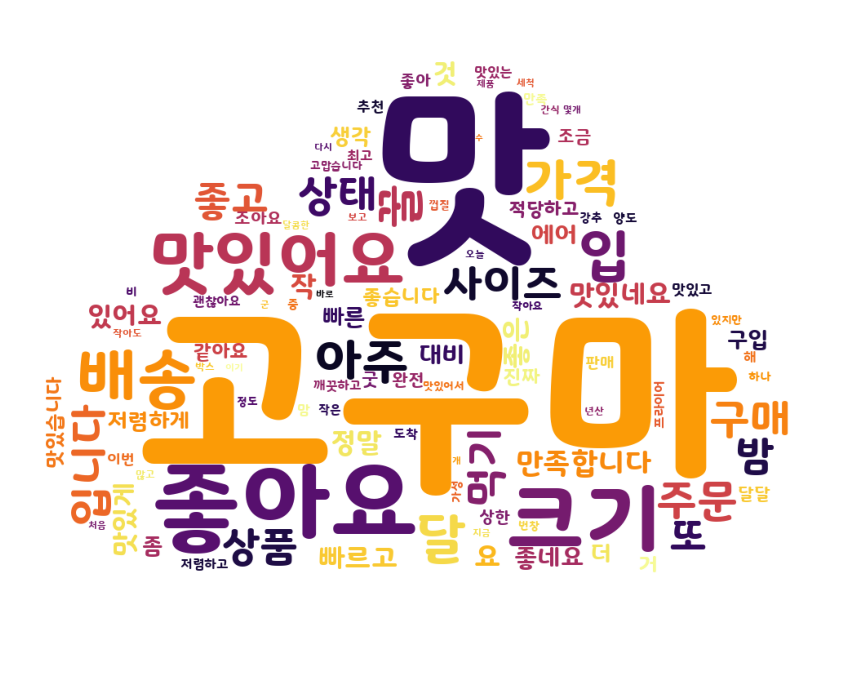

In [99]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

alice_coloring = np.array(Image.open('/content/cloud_image.png'))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(font_path = '/content/Binggrae_0.ttf', background_color='white',colormap = "inferno",mask=alice_coloring,width=1500, height=1000)
wc.generate_from_frequencies(good_top)

plt.imshow(wc)
figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.axis('off') 

plt.show()

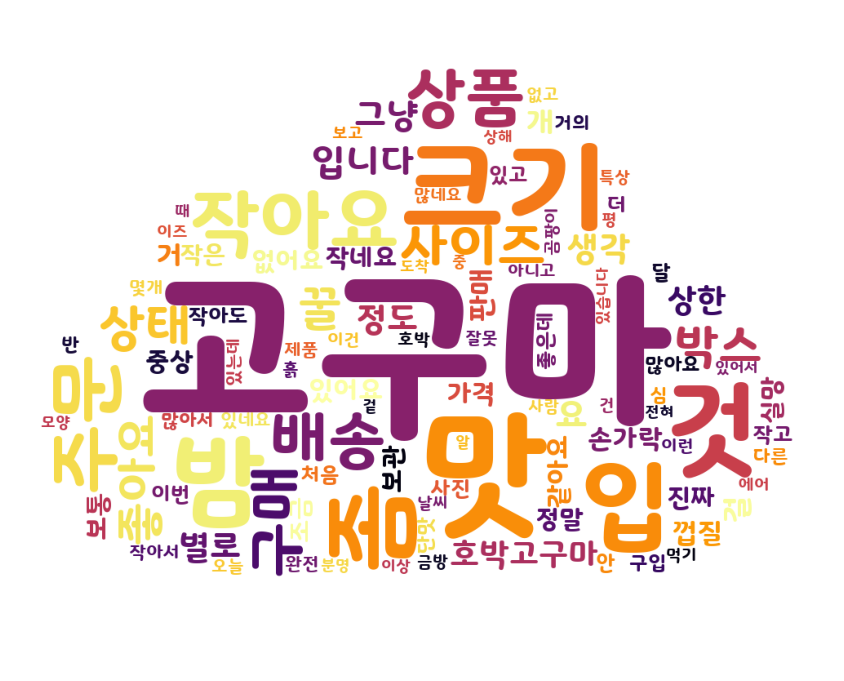

In [100]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

alice_coloring = np.array(Image.open('/content/cloud_image.png'))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(font_path = '/content/Binggrae_0.ttf', background_color='white',colormap = "inferno",mask=alice_coloring,width=1500, height=1000)
wc.generate_from_frequencies(bad_top) 

plt.imshow(wc)
figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.axis('off') 

plt.show()